Clustering, Linear Regression and Gradient Descent
---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

np.random.seed(1)


## Task1: Clustering
-----------
These programming exercises will focus on K-means clustering. 

If you're unsure of how k-means works, read this very helpful and freely available online breakdown from Stanford's CS221 course; https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

This assignment requires you to loosely interpret how k-means is a specific case of a more general algorithm named Expectation Maximisation. This is explained toward the end of the above article.

First, lets loading the dataset.

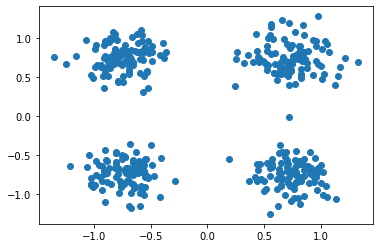

In [2]:
X = np.load("./data_clustering.npy")

plt.scatter(X[:,0], X[:,1])
plt.show()

K-means is a special, simple case of the Expectation Maximisation (EM) algorithm.

This simplified EM (k-means), is divided into two steps.

The **E-Step**, where for every sample in your dataset you find which "centroid" that datapoint is closest to that sample, and record that information.

The **M-Step**, where you move each "centroid" to the center of the samples which were found to be closest to it in the **E-Step**.

Each *centroid* is simply an estimated mean of a cluster. If you have $1$ centroid, then this centroid will become the mean of all your data.

Centroids are initially random values, and the k-means algorithm attempts to modify them so that each one represents the center of a cluster.

We have implemented a centroids initialization function.

In [49]:
def initialise_parameters(m, X):
    C = X[np.random.choice(X.shape[0], m)]
    return C

C = initialise_parameters(4, X)
print(C)

[[ 0.66527383  0.6250274 ]
 [-0.96774889  0.66432807]
 [ 1.20660584  0.74298998]
 [ 1.14566307  0.51306386]]


Now let's implement K-Means algorithm.

---
   **TASK 1.1:** Create a function $E\_step(C, X) = L$, where $L$ is a matrix of the same dimension of the dataset $X$.
   
   This function is is the **E-Step** (or "assignment step") mentioned earlier.

---

**HINT:** 
- https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
- https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm
- Each row of $L$ is a centroid taken from $C$.

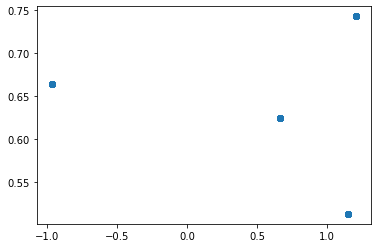

In [50]:

def E_step(C, X):
    a , b = np.shape(X)
    Y = np.zeros((a, b))
    # 1.1: for each the sample, find its closest centroid
    #  If there two points will return ([the closet centroid for data1],[the closet centroid for data2])

    number_of_lists = len(C)
    empty_lists = [[] for i in range(number_of_lists)]
    index3 = 0
    for row in X:
        index = 0
        while index < number_of_lists:
            empty_lists[index] = np.linalg.norm(row - C[index])
            index += 1

        a = min(empty_lists)
        index2 = empty_lists.index(a)
        Y[index3] = C[index2]
        index3 += 1
    return Y
            
L = E_step(C, X)

plt.scatter(L[:, 0], L[:, 1])
plt.show()

**TASK 1.2:** Create a function $M\_step(C, X, L) = C$ which returns $C$ modified so that each centroid in $C$ is placed in the middle of the samples assigned to it. This is the **M-Step**.

In other words, make each centroid in $C$ the average of all the samples which were found to be closest to it during the **E-step**. This is also called the "update step" for K-means.

---

**HINT:** https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_equal.html

In [51]:

def M_step(C, X, L):
    l1 = len(X)

    number_of_lists = len(C)
    empty_lists = [[] for i in range(number_of_lists)]
    for i in range(len(empty_lists)):
        empty_lists[i] = []
    for x in range(l1):
        index = 0
        while index < len(C):
            if (C[index] == L[x]).sum() == 2:
                empty_lists[index].append(X[x])

            index += 1

    for j in range(number_of_lists):
        div = len(empty_lists[j])
        x_cor = 0
        y_cor = 0
        index = 0
        for x , y in empty_lists[j]:
            x_cor = x_cor + x
            y_cor = y_cor + y
            index = index + 1

        C[j] = x_cor/index, y_cor/index
    return C
print('Before:')
print(C)
print('\nAfter:')
new_C = M_step(C, X, L)
print(new_C)


Before:
[[ 0.66527383  0.6250274 ]
 [-0.96774889  0.66432807]
 [ 1.20660584  0.74298998]
 [ 1.14566307  0.51306386]]

After:
[[ 0.61944646  0.45778999]
 [-0.74138919  0.00827681]
 [ 1.03570999  0.89708848]
 [ 0.82989738 -0.66530307]]


**TASK 1.3:** Implement $kmeans(X, m, i) = C, L$ which takes a dataset $X$ (of any dimension) and a scalar value $m$, and uses the previous 3 functions you wrote to:
- generate $m$ centroids.
- iterate between the E and M steps $i$ times (ie, it iterates $i$ times) to classify the $m$ clusters.

...and then returns:
- $C$, the centers of the $m$ clusters after $i$ iterations.
- $L$, the labels (centroid values) assigned to each sample in the dataset after $i$ iterations.
---
**HINT:** Using initialise_parameters to initial centroid

Initial Parameters:
[[ 0.61944646  0.45778999]
 [-0.74138919  0.00827681]
 [ 1.03570999  0.89708848]
 [ 0.82989738 -0.66530307]]

Final Parameters:
[[-0.74965351  0.7531092 ]
 [ 0.72539561  0.75302836]
 [-0.73312486 -0.73655558]
 [ 0.74859936 -0.74619961]]


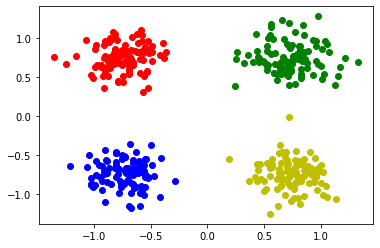

In [52]:
def kmeans(X, m, i):
    index = 0
    initial = initialise_parameters(m, X)


    while index < i:
        answer = E_step(initial, X)
        initial = M_step(initial, X, answer)
        index += 1
    
    return initial, answer
    

#CODE TO DISPLAY YOUR RESULTS. DO NOT MODIFY.
C_final, L_final = kmeans(X, 4, 10)
print('Initial Parameters:')
print(C)
print('\nFinal Parameters:')
print(C_final)

def allocator(X, L, c):
    cluster = []
    for i in range(L.shape[0]):
        if np.array_equal(L[i, :], c):
            cluster.append(X[i, :])
    return np.asarray(cluster)

colours = ['r', 'g', 'b', 'y']
for i in range(4):
    cluster = allocator(X, L_final, C_final[i, :])
    plt.scatter(cluster[:,0], cluster[:,1], c=colours[i])
plt.show()

Your answer should like this, maybe with different colors:
![image](./cluster.png)

---
**TASK 1.4:** Explain how do you find the number of centroids

---
**Answer:**: Finding the number of m is difficult since it is a hyperparameter and in this task we didnt really find the number of centroids as we where given an output.In real life scenarios the best method is usually the "elbow" method as discussed in class where we trying to minimize "loss" by picking a greater number of centroids to reduce the distance between the given records and the centroids. But there comes a point of diminishing returns as the number of "clusters" approaches the number of given obersation which makes the model useless (Validation loss). We use the gradient of the training loss and number of gradient curve and pick ideal number of centroids to balance both validation and training loss.

## Task 2: Linear Regression and Gradient Descent
---

For exercise 2, we're going to implement multiple target **batch** linear regression with mean squared loss,

$$\mathcal{L} = \frac{1}{2 m} \sum_{i = 0}^{m} \mid \mid x_i\theta - y_i \mid \mid^2$$.

For the following questions:
- $x \in \mathbb{R}^{m}$ is the vector directly representing input features from the provided dataset. Each row of $x$ is a single training example.
- $X \in \mathbb{R}^{m \times n}$ is the constructed feature matrix (e.g. polynomial features) used for learning. Each row of $X$ is a single training example.
- $\theta$ is our parameters. In the linear regression you've seen thus far, this is a vector. However, as we're doing multiple target linear regression, $\theta$ will be a matrix.
- $y \in \mathbb{R}^{m}$ is a matrix of the target values we're trying to estimate for each row of $X$. Each row $i$ of $X$ corresponds to row $i$ of $Y$.
- $m$ is the number of training examples.
- $n$ is the dimensionality of one training example.

Typically when people think of linear regression, they think of a mapping from $\mathbb{R}^n \rightarrow \mathbb{R}$, where they're trying to predict a single scalar value.

---
First, we load the data.

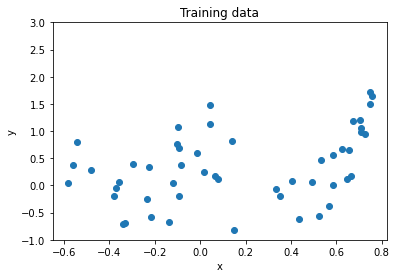

In [19]:
x_train, x_val, y_train, y_val = np.load("./data_regression.npy")
plt.plot(x_train,y_train,'o') ## just displays the given training data on a x,y axis.
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training data")
plt.ylim([-1,3])
plt.show()

It is obvious that it is not a good idea to perform linear regression directly on the input feature `x`. We need to add polynomial features. Lets construct an appropriate feature vector.

---
**Task 2.1**:  Complete the `get_polynomial_features` function with the following specifications.
* Input1: an array `x` of shape $(m,1)$.
* Input2: `degree` of the polynomial (integer greater than or equal to one).
* Output: matrix of shape $(m,degree+1)$ consisting of horizontally concatenated polynomial terms.
* Output: the first column of output matrix should be all ones.
---

In [47]:
def get_polynomial_features(x,degree=5):
    
    # the aim of this function is that given an input x and say degree five return [x^0 , x^1 , x^2, x^3, x^4, x^5] and return 
    # this for eversingle row in X. Note function will work for other degrees as well. Also X^0 is always 1 therefore the first 
    # column of every row is 1 as specified.

    row = x.shape
    out = np.zeros((row[0], degree + 1))

    horizontal = degree + 1
    vertical = row[0]
    index2 = 0

    for real in x:
        index = 0
        counter = 0
        while index != horizontal:
            out[index2][index] = real ** counter
            counter = counter + 1
            index = index + 1
        index2 = index2 + 1
    return out
    

# get polynpomial features
X_train = get_polynomial_features(x_train,degree=5)





Let us implement gradient descent to find the optimal $\theta$.


---
**TASK 2.2:** Write a function $initialise\_parameters(n) = \theta$, where $\theta$ is the parameters we will use for linear regression $X\theta = Y$ for $X \in \mathbb{R}^{m \times n}, Y \in \mathbb{R}^{m}$.

The values of $\theta$ should be randomly generated. You will be judged on whether the matrix $\theta$ is correctly constructed for this problem.


---

**HINT:** $\theta$ should be an array of length $n$.

In [32]:
def initialise_parameters(n):
    # for 𝜃   to be a parameter for linear regression  𝑋𝜃=𝑌 it needs to be in a certain shape
    # note shape of X =m*n and shape of Y is m therefore following matrix multiplication rules we get the following.
    # m*n x n*_ = m
    # = m*n x n*_ = m*1
    # therefore m*n x n*1 = m*1 (inner need to match for matrix multiplication and outter dimensions are the resulting matrix)
    ans = np.random.randint(10, size=(n, 1))
    return ans

# initialize theta
theta = initialise_parameters(X_train.shape[1])
print(theta)

[[6]
 [9]
 [1]
 [0]
 [1]
 [8]]


---
**TASK 2.3:** Implement a function $ms\_error(X, \theta, y) = err$, which gives the **mean** squared error over all $m$ training examples.

---

In [35]:
def ms_error(X, theta, y):
# normally the mean squared error is automated using prebuilt libraries and normally uses a different formula 
#(instead of 2m, m is used)

# function basically takes all the X elements and multiplies them with the corresponding theta so formula is like
# [x^0*(𝜃[0]) + x^1*(𝜃[1]) + x^2*(𝜃[2]) + x^3*(𝜃[3]) + x^4*(𝜃[4]) + x^5*(𝜃[5])] == A
# we then take (A-y)**2 and finally multiple by 1/2m which in this case is 1/100 and sum all values together.

  
    first = np.dot(X[0], theta)

    a,b = X.shape
    arr1 = np.zeros([a, 1])
    index1 = 0

    for row in range(len(X)):
        arr1[index1] = np.dot(X[row], theta)
        index1 += 1

    arr2 = np.zeros([a, 1])
    index2 = 0
    for row2 in range(len(y)):
        arr2[index2] = y[row2]
        index2 += 1

    s1 = np.subtract(arr1,arr2)

    newarr = np.square(s1)
    answer = 0
    for val in range(len(newarr)):
        answer = answer + newarr[val]

    length = 2*len(X)
    final = answer * 1/length

    return final.__float__()


print(ms_error(X_train, theta, y_train))

39.531042848528855


---

**TASK 2.4:** Implement $grad(X, \theta, Y) = g$, a function that returns the average gradient ($\partial \mathcal{L}/\partial {\theta}$) across all the training examples $x_i \in \mathbb{R}^{1 \times n}$.

---

**HINT:** 
- The gradient should be an array with same length as $\theta$.
- https://www.sharpsightlabs.com/blog/numpy-sum/
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html

In [40]:
def grad(X, theta, Y):
    # this function uses the dl/d𝜃 as described in the lecture slides week 6 page 10. Note indead of using N we used 2N becuase
    # our loss function is slightly different from the slides
    
    indexer = -1
    arr1 = np.zeros((len(X), len(theta)))
    m_val = 1 / (2 * len(X))

    for row_m in range(len(X)):
        indexer += 1
        for col in range(len(theta)):
            arr1[row_m][col] = m_val * (
                    (-2 * (Y[indexer] * X[indexer][col])) + 2 * theta[0] * X[indexer][col] * Y[indexer])

    col_sum = arr1.sum(axis=0)
    col_sum = col_sum / (len(X))
    a, b = np.shape(theta)

    col_sum = np.reshape(col_sum, (a, b))
    return col_sum


print(grad(X_train, theta, y_train))


[[0.03375485]
 [0.01586923]
 [0.01258406]
 [0.00834417]
 [0.00651263]
 [0.00442862]]


---

**TASK 2.5:** Implement $batch\_descent(X, Y, iterations, learning\_rate) = \theta, L$, a function which implements batch gradient descent returning $\theta$ (parameters which estimate $Y$ from $X$), and $L$.

$iterations$ is the number of gradient descent iterations to be performed.

$learning\_rate$ is, of course, the learning rate.

$L$ is a matrix recording the mean squared error at every iteration of gradient descent. It will be an array of length $iterations$.

You should use the functions you completed earlier to complete this. 

---

**HINT:** 
- Remember, the point of gradient descent is to minimise the loss function. 
- It does this by taking "steps". The gradient always points in the steepest direction uphill, so by stepping in the opposite direction of the gradient we move toward the value of $\theta$ that minimises the loss function.

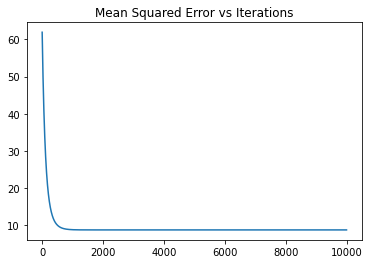

New Theta: 
 [[1.        ]
 [4.17920896]
 [1.76315517]
 [3.5168051 ]
 [7.84236543]
 [2.212803  ]]

Final Mean Squared Error: 
 8.718277443950015


In [42]:
def batch_descent(X, Y, iterations, learning_rate):
    # turn X values into [x^0 , x^1 , x^2, x^3, x^4, x^5]
    X_train = get_polynomial_features(X, degree=5)
    # get initial theta - random values 
    initial = initialise_parameters(X_train.shape[1])
    
    
    index = 0
    l_matrix = np.zeros((iterations, 1))
    while index < iterations:
        err = ms_error(X_train, initial, Y)
        l_matrix[index] = err
        gradient = grad(X_train, initial, Y)
        learning_gradient = gradient * learning_rate
        initial = initial - learning_gradient
        index += 1

    return initial, l_matrix





#REPORTING CODE. YOU MAY NEED TO MODIFY THE LEARNING RATE OR NUMBER OF ITERATIONS
new_theta, L = batch_descent(x_train, y_train, 10000, 0.9)
plt.plot(L)
plt.title('Mean Squared Error vs Iterations')
plt.show()
print('New Theta: \n', new_theta)
print('\nFinal Mean Squared Error: \n', ms_error(X_train, new_theta, y_train))

## Task 3: Regularization and Model Selection
---

In task 2, we focussed on using gradient descent to do linear regression with a polynomial of degree 5.

Next, we would try to select a model that gives best performance on the val set.

---
**Task 3.1**:  Visualize the prediction curves for different choice of degree polynomial features, by completing the code below. 

- You can use the closed form solution or gradient descent for computing $\theta$.
- Compute the predictions on val data using `x_val` and computed $\theta$.
---

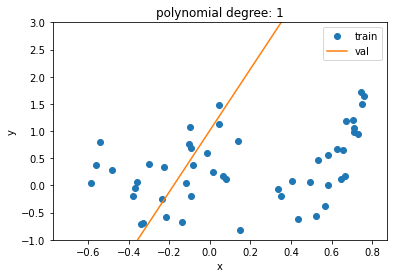

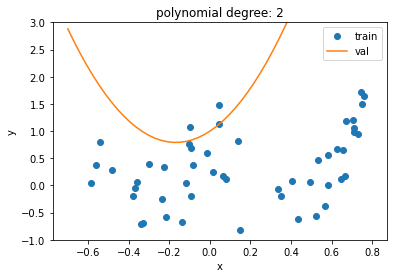

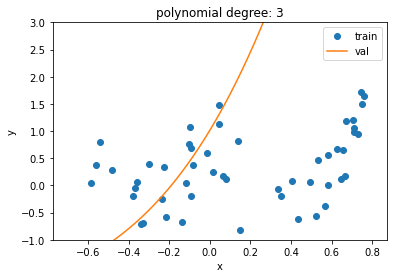

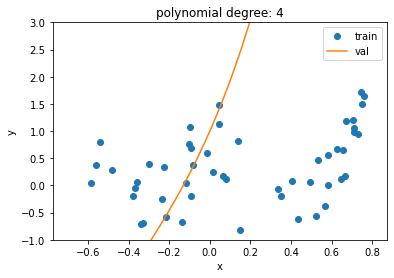

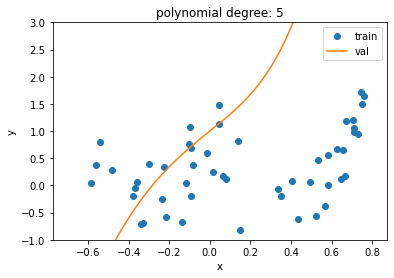

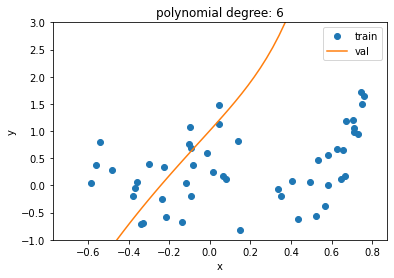

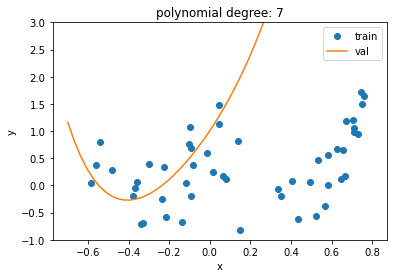

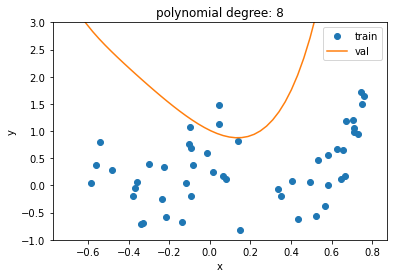

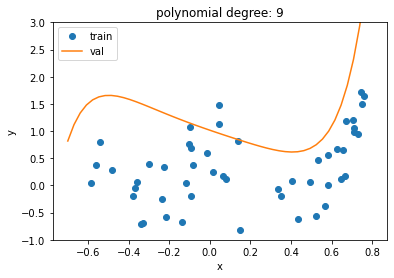

In [43]:
def batch_descent(X, Y, iterations, learning_rate):
    # turn X values into [x^0 , x^1 , x^2, x^3, x^4, x^5]
    X_train = X ## NOTE THIS IS DIFFERENT FROM THE ONE ABOVE THAT ONLY EXCEPT DEGREE 5
    # get initial theta - random values 
    initial = initialise_parameters(X_train.shape[1])
    
    
    index = 0
    l_matrix = np.zeros((iterations, 1))
    while index < iterations:
        err = ms_error(X_train, initial, Y)
        l_matrix[index] = err
        gradient = grad(X_train, initial, Y)
        learning_gradient = gradient * learning_rate
        initial = initial - learning_gradient
        index += 1

    return initial, l_matrix


def get_theta(X,y):
    e, f = batch_descent(X, y, 10000, 0.09)
    return e

def get_prediction(X,theta):
    a, b = X.shape
    ans = np.zeros((a, b))
    ans = np.dot(X, theta)
    return 


for degree in range(1,10):
    # prepare train/val data
    X_train = get_polynomial_features(x_train,degree=degree)
    x_val = np.linspace(-0.7, 0.8, x_val.shape[0])
    X_val = get_polynomial_features(x_val,degree=degree)
    
    # get theta
    theta = get_theta(X_train,y_train)
    
    # compute predictions on train/val set
    pred_y_train = get_prediction(X_train,theta)
    pred_y_val = get_prediction(X_val,theta)
    
    # plot results
    plt.plot(x_train,y_train,'o',label='train')
    plt.plot(x_val,pred_y_val,label='val')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title("polynomial degree: {}".format(degree))
    plt.ylim([-1,3])
    plt.show()
    


---
**Task 2.2**:  Draw the train, val loss curve for different degree polynomials by completing the following code.

---


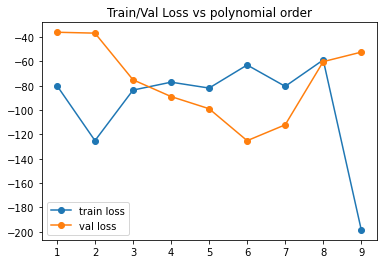

In [46]:
x_train, x_val, y_train, y_val = np.load("./data_regression.npy")
# store train/val loss values
train_loss, val_loss = [], []
a,  = np.shape(x_val)

v_lossSum = np.zeros((a,))
t_lossSum = np.zeros((a,))

for degree in range(1, 10):
    # prepare train/val data
    X_train = get_polynomial_features(x_train, degree=degree)
    X_val = get_polynomial_features(x_val, degree=degree)

    # get theta
    theta1 = get_theta(X_val, y_val)
    theta2 = get_theta(X_train, y_train)

    # compute train/val losses
    arr1 = np.dot(X_train, theta2)

    arr2 = np.dot(X_val, theta1)

    for row in range(len(y_val)):
        [answer] = y_val[row] - arr2[row]
        v_lossSum[row] = answer
    for row in range(len(y_train)):
        [answer] = y_train[row] - arr1[row]
        t_lossSum[row] = answer


    answer_val = 0
    answer_t = 0

    for x in v_lossSum:
        answer_val = x + answer_val

    for y in t_lossSum:
        answer_t = answer_t + y

    train_loss.append(answer_t)
    val_loss.append(answer_val)

plt.plot(range(1,10),train_loss,'-o',label='train loss')
plt.plot(range(1,10),val_loss,'-o',label='val loss')
plt.xticks(range(1,10))
plt.legend()
plt.title('Train/Val Loss vs polynomial order')
plt.show()




---
**Task 2.3**:  What is the best choice for degree of polynomial features suitable for this problem?

---

**Answer**: polynomial of degree 4 seems like the best fit for my model based on the visual inspection of the batch decent graphs. It also is where the gradient for the val loss flatlines.
